In [66]:
# Importing needed EDA and Plotting libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Some Information about the data

* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.

In [54]:
df = pd.read_csv("./data/train.csv", index_col="PassengerId")

In [55]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
len(df)

891

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [58]:
def preprocess_data(df):
    """
    Performs transformations on the dataframe(df) and returns transformed dataframe
    """
    df_tmp = df
    df_tmp.drop("Ticket",axis=1,inplace=True)
    df_tmp.drop("Name",axis=1,inplace=True)
    for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_tmp[label+"_is_missing"] = pd.isnull(content)
                df_tmp[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label]= pd.Categorical(content).codes+1
    
    return df_tmp

In [59]:
df_tmp = preprocess_data(df)
df_tmp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,,,,,,,,,,,,
1,0,3,2,22.0,1,0,7.2500,0,3,False,True,False
2,1,1,1,38.0,1,0,71.2833,82,1,False,False,False
3,1,3,1,26.0,0,0,7.9250,0,3,False,True,False
4,1,1,1,35.0,1,0,53.1000,56,3,False,False,False
5,0,3,2,35.0,0,0,8.0500,0,3,False,True,False


In [60]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Sex                  891 non-null    int8   
 3   Age                  891 non-null    float64
 4   SibSp                891 non-null    int64  
 5   Parch                891 non-null    int64  
 6   Fare                 891 non-null    float64
 7   Cabin                891 non-null    int16  
 8   Embarked             891 non-null    int8   
 9   Age_is_missing       891 non-null    bool   
 10  Cabin_is_missing     891 non-null    bool   
 11  Embarked_is_missing  891 non-null    bool   
dtypes: bool(3), float64(2), int16(1), int64(4), int8(2)
memory usage: 54.8 KB


In [62]:
df_tmp.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.276235,-0.176509,-0.092197,-0.316912,0.060095
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.537419,0.173511,0.172933,0.725541,-0.074282
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.137704,0.118492,0.055215,0.140391,-0.064296
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.164550,-0.031903,-0.052098,-0.240314,0.075229
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.024829,0.071480,0.018958,0.040460,-0.022508
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.033585,0.043351,-0.124104,-0.036987,-0.022467
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.310987,-0.230365,-0.100707,-0.482075,0.045646
Cabin,0.276235,-0.537419,-0.137704,0.164550,-0.024829,0.033585,0.310987,1.000000,-0.070245,-0.130797,-0.848723,0.005438
Embarked,-0.176509,0.173511,0.118492,-0.031903,0.071480,0.043351,-0.230365,-0.070245,1.000000,-0.146888,0.173895,-0.150022
Age_is_missing,-0.092197,0.172933,0.055215,-0.052098,0.018958,-0.124104,-0.100707,-0.130797,-0.146888,1.000000,0.144111,-0.023616


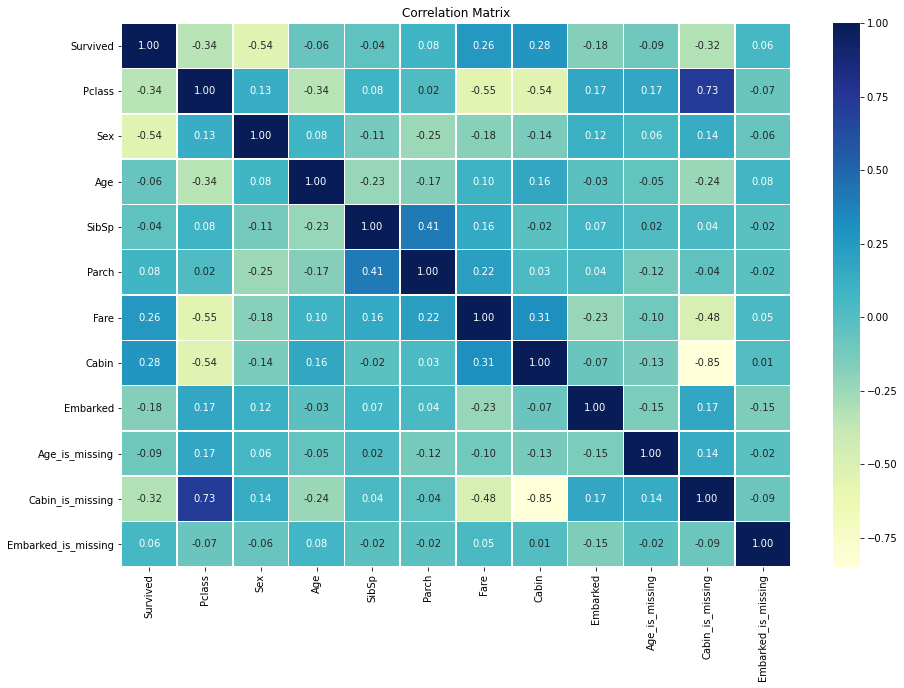

In [69]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');
plt.title("Correlation Matrix");

In [70]:
## Importing sklearn tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [71]:
X = df_tmp.drop("Survived", axis=1)
y = df_tmp.Survived

In [72]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,,,,,,,,,,,
1,3,2,22.0,1,0,7.2500,0,3,False,True,False
2,1,1,38.0,1,0,71.2833,82,1,False,False,False
3,3,1,26.0,0,0,7.9250,0,3,False,True,False
4,1,1,35.0,1,0,53.1000,56,3,False,False,False
5,3,2,35.0,0,0,8.0500,0,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,2,2,27.0,0,0,13.0000,0,3,False,True,False
888,1,1,19.0,0,0,30.0000,31,3,False,False,False
889,3,1,28.0,1,2,23.4500,0,3,True,True,False


In [73]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [75]:
## Splitting data into train and test sets
np.random.seed(99)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [76]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,,,,,,,,,,,
267,3,2,16.0,4,1,39.6875,0,3,False,True,False
583,2,2,54.0,0,0,26.0000,0,3,False,True,False
707,2,1,45.0,0,0,13.5000,0,3,False,True,False
133,3,1,47.0,1,0,14.5000,0,3,False,True,False
816,1,2,28.0,0,0,0.0000,17,3,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
714,3,2,29.0,0,0,9.4833,0,3,False,True,False
169,1,2,28.0,0,0,25.9250,0,3,True,True,False
186,1,2,28.0,0,0,50.0000,10,3,True,False,False


In [78]:
y_train , len(y_train)

(PassengerId
 267    0
 583    0
 707    1
 133    0
 816    0
       ..
 714    0
 169    0
 186    0
 36     0
 642    1
 Name: Survived, Length: 712, dtype: int64,
 712)

In [79]:
## Evaluating 3 models on the dataset
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(99)
    
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [80]:
model_socres = fit_and_score(models,X_train,X_test,y_train,y_test)

D:\Work\titanic_survivor\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
model_socres

{'Logistic Regression': 0.7653631284916201,
 'KNN': 0.7262569832402235,
 'Random Forest': 0.8212290502793296}

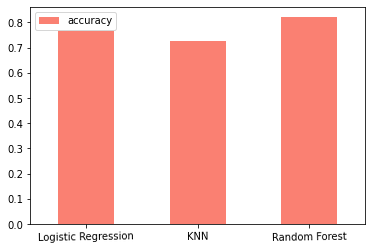

In [84]:
model_compare = pd.DataFrame(model_socres, index=["accuracy"])
model_compare.T.plot.bar(rot=1, color=["salmon"]);

### Eliminating KNN as first elimination due to lower accuracy

###### Going for hyperparameter tuning via GridSearchCV

In [107]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4,30),
                "solver": ["liblinear", "lbfgs"],
                "max_iter":[1000]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 500, 100),
           "max_depth": [None, 5, 10],
           "min_samples_split": np.arange(2, 20, 4),
           "min_samples_leaf": np.arange(1, 20, 4),
          "max_features":[None,"sqrt", "log2"]}

In [101]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=True)

#fit the grid search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.4s finished


In [106]:
gs_log_reg.score(X_test,y_test), gs_log_reg.best_params_

(0.7653631284916201,
 {'C': 17.433288221999874, 'max_iter': 1000, 'solver': 'liblinear'})

In [108]:
gs_rfc = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                      n_jobs=-1,
                     cv=5,
                     verbose=True)
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5625 out of 5625 | elapsed:  5.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([ 10, 110, 210, 310, 410])},
             verbose=True)

In [109]:
gs_rfc.score(X_test,y_test)

0.7988826815642458

In [110]:
gs_rfc.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 10}

### Analyzing the result

As seen from the results post hyper parameter tuning:
Logistic regression could give 76% accuracy 
Random Forest Classifier gave 79% accuracy

hence we can say out of the box Random Forest Classifier provides better accuracy i.e 82%

Hence we can select Random Forest Classifier as our model 
 can also look for CatBoost

In [123]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=5,
                          depth=2,
                          learning_rate=1,
                          loss_function="Logloss",
                          verbose=True)
model.fit(X_train,y_train)

0:	learn: 0.5009515	total: 521us	remaining: 2.09ms
1:	learn: 0.4513490	total: 1.12ms	remaining: 1.69ms
2:	learn: 0.4412752	total: 1.58ms	remaining: 1.06ms
3:	learn: 0.4257229	total: 2.07ms	remaining: 517us
4:	learn: 0.4078047	total: 2.54ms	remaining: 0us


In [125]:
model.score(X_test,y_test)

0.7653631284916201

In [133]:
cat_grid = {
    "learning_rate":[None,0.1,0.5,1],
    "depth":[None, 5, 10],
    "iterations":np.arange(10, 500, 100),
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
model2 = CatBoostClassifier()

model2.grid_search(param_grid=cat_grid,
                  X=X_train,
                  y=y_train,
                  cv=5, plot=True
                  )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.4246016915
bestIteration = 9

0:	loss: 0.4246017	best: 0.4246017 (0)	total: 32.9ms	remaining: 9.84s

bestTest = 0.394509117
bestIteration = 6

1:	loss: 0.3945091	best: 0.3945091 (1)	total: 44.7ms	remaining: 6.66s

bestTest = 0.4057940098
bestIteration = 7

2:	loss: 0.4057940	best: 0.3945091 (1)	total: 58.4ms	remaining: 5.78s

bestTest = 0.4293375324
bestIteration = 9

3:	loss: 0.4293375	best: 0.3945091 (1)	total: 69.9ms	remaining: 5.17s

bestTest = 0.3916604149
bestIteration = 5

4:	loss: 0.3916604	best: 0.3916604 (4)	total: 80.9ms	remaining: 4.77s

bestTest = 0.3920299258
bestIteration = 6

5:	loss: 0.3920299	best: 0.3916604 (4)	total: 92ms	remaining: 4.51s

bestTest = 0.4479449209
bestIteration = 9

6:	loss: 0.4479449	best: 0.3916604 (4)	total: 103ms	remaining: 4.29s

bestTest = 0.385009478
bestIteration = 8

7:	loss: 0.3850095	best: 0.3850095 (7)	total: 113ms	remaining: 4.14s

bestTest = 0.4047269139
bestIteration = 3

8:	loss: 0.4047269	best: 0.3850095 (7)	total: 125m


bestTest = 0.3799251351
bestIteration = 120

72:	loss: 0.3799251	best: 0.3694743 (15)	total: 16.9s	remaining: 52.6s

bestTest = 0.3804861922
bestIteration = 27

73:	loss: 0.3804862	best: 0.3694743 (15)	total: 17.4s	remaining: 53s

bestTest = 0.4011623069
bestIteration = 4

74:	loss: 0.4011623	best: 0.3694743 (15)	total: 17.9s	remaining: 53.6s

bestTest = 0.4133717829
bestIteration = 9

75:	loss: 0.4133718	best: 0.3694743 (15)	total: 17.9s	remaining: 52.8s

bestTest = 0.3744356678
bestIteration = 5

76:	loss: 0.3744357	best: 0.3694743 (15)	total: 18s	remaining: 52s

bestTest = 0.4291007735
bestIteration = 4

77:	loss: 0.4291008	best: 0.3694743 (15)	total: 18s	remaining: 51.3s

bestTest = 0.4236233484
bestIteration = 9

78:	loss: 0.4236233	best: 0.3694743 (15)	total: 18.1s	remaining: 50.6s

bestTest = 0.4072003899
bestIteration = 8

79:	loss: 0.4072004	best: 0.3694743 (15)	total: 18.1s	remaining: 49.9s

bestTest = 0.3865156929
bestIteration = 4

80:	loss: 0.3865157	best: 0.3694743 (15)	


bestTest = 0.3946482377
bestIteration = 3

143:	loss: 0.3946482	best: 0.3627317 (91)	total: 2m 4s	remaining: 2m 15s

bestTest = 0.384356874
bestIteration = 52

144:	loss: 0.3843569	best: 0.3627317 (91)	total: 2m 8s	remaining: 2m 16s

bestTest = 0.3994999373
bestIteration = 7

145:	loss: 0.3994999	best: 0.3627317 (91)	total: 2m 11s	remaining: 2m 18s

bestTest = 0.4004373482
bestIteration = 3

146:	loss: 0.4004373	best: 0.3627317 (91)	total: 2m 14s	remaining: 2m 20s

bestTest = 0.3901690318
bestIteration = 61

147:	loss: 0.3901690	best: 0.3627317 (91)	total: 2m 18s	remaining: 2m 21s

bestTest = 0.3842967326
bestIteration = 7

148:	loss: 0.3842967	best: 0.3627317 (91)	total: 2m 21s	remaining: 2m 23s

bestTest = 0.4041466774
bestIteration = 2

149:	loss: 0.4041467	best: 0.3627317 (91)	total: 2m 24s	remaining: 2m 24s
Estimating final quality...


{'params': {'depth': 10,
  'l2_leaf_reg': 1,
  'iterations': 110,
  'learning_rate': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [134]:
model2.score(X_test,y_test)

0.8379888268156425

In [139]:
model2.get_params()

{'depth': 10, 'l2_leaf_reg': 1, 'iterations': 110, 'learning_rate': 0.5}

Catboost seems to perform better than All the other models

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisons and evaluate our trained model, first we need to make predictions.

In [143]:
cat_model = model2
y_preds = cat_model.predict(X_test)

In [144]:
y_preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [145]:
y_test

PassengerId
248    1
824    1
567    0
667    0
200    0
      ..
779    0
624    0
468    0
677    0
669    0
Name: Survived, Length: 179, dtype: int64

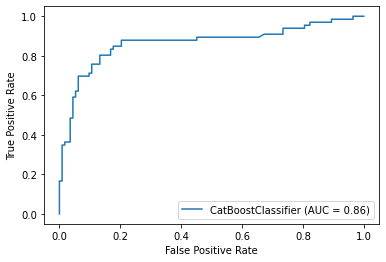

In [146]:
## Plotting roc curve
plot_roc_curve(cat_model,X_test,y_test)

In [147]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[101  12]
 [ 17  49]]


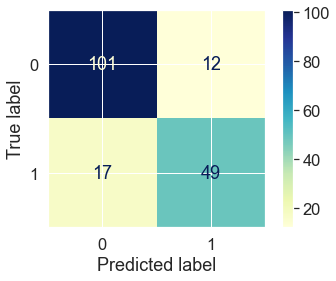

In [152]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cat_model,X_test,y_test,cmap="YlGnBu");

In [153]:
## classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       113
           1       0.80      0.74      0.77        66

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [155]:
cv_acc = cross_val_score(cat_model, X , y, cv=5, scoring="accuracy")
cv_acc

0:	learn: 0.5466485	total: 8.81ms	remaining: 960ms
1:	learn: 0.4596378	total: 17.1ms	remaining: 924ms
2:	learn: 0.4216818	total: 25.3ms	remaining: 902ms
3:	learn: 0.3920632	total: 33.4ms	remaining: 885ms
4:	learn: 0.3684903	total: 43.4ms	remaining: 911ms
5:	learn: 0.3520497	total: 51.6ms	remaining: 894ms
6:	learn: 0.3330152	total: 59.5ms	remaining: 876ms
7:	learn: 0.3241390	total: 67.4ms	remaining: 860ms
8:	learn: 0.3131714	total: 75.1ms	remaining: 843ms
9:	learn: 0.3000074	total: 83ms	remaining: 830ms
10:	learn: 0.2932513	total: 90.9ms	remaining: 818ms
11:	learn: 0.2873014	total: 98.4ms	remaining: 804ms
12:	learn: 0.2815760	total: 106ms	remaining: 792ms
13:	learn: 0.2780887	total: 110ms	remaining: 756ms
14:	learn: 0.2713926	total: 114ms	remaining: 722ms
15:	learn: 0.2659003	total: 122ms	remaining: 716ms
16:	learn: 0.2602818	total: 130ms	remaining: 710ms
17:	learn: 0.2559438	total: 138ms	remaining: 703ms
18:	learn: 0.2521382	total: 145ms	remaining: 696ms
19:	learn: 0.2481879	total: 153

71:	learn: 0.0918694	total: 589ms	remaining: 311ms
72:	learn: 0.0910107	total: 597ms	remaining: 303ms
73:	learn: 0.0900903	total: 606ms	remaining: 295ms
74:	learn: 0.0889598	total: 615ms	remaining: 287ms
75:	learn: 0.0877768	total: 624ms	remaining: 279ms
76:	learn: 0.0871244	total: 631ms	remaining: 271ms
77:	learn: 0.0864865	total: 640ms	remaining: 262ms
78:	learn: 0.0858229	total: 648ms	remaining: 254ms
79:	learn: 0.0849735	total: 656ms	remaining: 246ms
80:	learn: 0.0840875	total: 664ms	remaining: 238ms
81:	learn: 0.0831094	total: 672ms	remaining: 230ms
82:	learn: 0.0822366	total: 680ms	remaining: 221ms
83:	learn: 0.0814048	total: 688ms	remaining: 213ms
84:	learn: 0.0805873	total: 696ms	remaining: 205ms
85:	learn: 0.0799463	total: 704ms	remaining: 197ms
86:	learn: 0.0790334	total: 712ms	remaining: 188ms
87:	learn: 0.0776992	total: 721ms	remaining: 180ms
88:	learn: 0.0771454	total: 729ms	remaining: 172ms
89:	learn: 0.0762443	total: 737ms	remaining: 164ms
90:	learn: 0.0757378	total: 746

17:	learn: 0.2631882	total: 119ms	remaining: 609ms
18:	learn: 0.2541493	total: 128ms	remaining: 611ms
19:	learn: 0.2431425	total: 136ms	remaining: 612ms
20:	learn: 0.2304483	total: 146ms	remaining: 617ms
21:	learn: 0.2259332	total: 155ms	remaining: 618ms
22:	learn: 0.2200243	total: 163ms	remaining: 615ms
23:	learn: 0.2153475	total: 171ms	remaining: 612ms
24:	learn: 0.2115143	total: 179ms	remaining: 609ms
25:	learn: 0.2074763	total: 187ms	remaining: 606ms
26:	learn: 0.2053374	total: 196ms	remaining: 602ms
27:	learn: 0.2026887	total: 204ms	remaining: 598ms
28:	learn: 0.1972721	total: 212ms	remaining: 593ms
29:	learn: 0.1905641	total: 223ms	remaining: 595ms
30:	learn: 0.1883205	total: 234ms	remaining: 597ms
31:	learn: 0.1828702	total: 246ms	remaining: 598ms
32:	learn: 0.1805883	total: 256ms	remaining: 598ms
33:	learn: 0.1784242	total: 268ms	remaining: 598ms
34:	learn: 0.1735652	total: 279ms	remaining: 598ms
35:	learn: 0.1683170	total: 291ms	remaining: 599ms
36:	learn: 0.1661199	total: 301

76:	learn: 0.1023515	total: 762ms	remaining: 327ms
77:	learn: 0.1006846	total: 771ms	remaining: 316ms
78:	learn: 0.0995254	total: 778ms	remaining: 305ms
79:	learn: 0.0987976	total: 782ms	remaining: 293ms
80:	learn: 0.0977226	total: 792ms	remaining: 284ms
81:	learn: 0.0966818	total: 800ms	remaining: 273ms
82:	learn: 0.0955792	total: 808ms	remaining: 263ms
83:	learn: 0.0949592	total: 816ms	remaining: 253ms
84:	learn: 0.0946083	total: 820ms	remaining: 241ms
85:	learn: 0.0943238	total: 828ms	remaining: 231ms
86:	learn: 0.0938354	total: 836ms	remaining: 221ms
87:	learn: 0.0926644	total: 843ms	remaining: 211ms
88:	learn: 0.0917305	total: 851ms	remaining: 201ms
89:	learn: 0.0908735	total: 859ms	remaining: 191ms
90:	learn: 0.0896683	total: 867ms	remaining: 181ms
91:	learn: 0.0890649	total: 875ms	remaining: 171ms
92:	learn: 0.0884034	total: 883ms	remaining: 161ms
93:	learn: 0.0874168	total: 891ms	remaining: 152ms
94:	learn: 0.0863577	total: 899ms	remaining: 142ms
95:	learn: 0.0856016	total: 907

array([0.79888268, 0.79775281, 0.84269663, 0.78651685, 0.84269663])

In [156]:
cv_acc = np.mean(cv_acc)
cv_acc

0.813709120582512

In [157]:
# Cross-validated precision
cv_precision = cross_val_score(cat_model,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0:	learn: 0.5466485	total: 8.18ms	remaining: 892ms
1:	learn: 0.4596378	total: 17.3ms	remaining: 932ms
2:	learn: 0.4216818	total: 25.5ms	remaining: 908ms
3:	learn: 0.3920632	total: 34.4ms	remaining: 910ms
4:	learn: 0.3684903	total: 43.1ms	remaining: 906ms
5:	learn: 0.3520497	total: 51.7ms	remaining: 896ms
6:	learn: 0.3330152	total: 60.6ms	remaining: 892ms
7:	learn: 0.3241390	total: 70.1ms	remaining: 893ms
8:	learn: 0.3131714	total: 79.3ms	remaining: 890ms
9:	learn: 0.3000074	total: 89.1ms	remaining: 891ms
10:	learn: 0.2932513	total: 97.4ms	remaining: 877ms
11:	learn: 0.2873014	total: 105ms	remaining: 858ms
12:	learn: 0.2815760	total: 113ms	remaining: 844ms
13:	learn: 0.2780887	total: 117ms	remaining: 803ms
14:	learn: 0.2713926	total: 121ms	remaining: 767ms
15:	learn: 0.2659003	total: 129ms	remaining: 756ms
16:	learn: 0.2602818	total: 137ms	remaining: 748ms
17:	learn: 0.2559438	total: 145ms	remaining: 739ms
18:	learn: 0.2521382	total: 153ms	remaining: 731ms
19:	learn: 0.2481879	total: 16

68:	learn: 0.0944745	total: 574ms	remaining: 341ms
69:	learn: 0.0938455	total: 582ms	remaining: 333ms
70:	learn: 0.0925804	total: 592ms	remaining: 325ms
71:	learn: 0.0918694	total: 600ms	remaining: 317ms
72:	learn: 0.0910107	total: 608ms	remaining: 308ms
73:	learn: 0.0900903	total: 616ms	remaining: 300ms
74:	learn: 0.0889598	total: 624ms	remaining: 291ms
75:	learn: 0.0877768	total: 632ms	remaining: 283ms
76:	learn: 0.0871244	total: 641ms	remaining: 275ms
77:	learn: 0.0864865	total: 648ms	remaining: 266ms
78:	learn: 0.0858229	total: 657ms	remaining: 258ms
79:	learn: 0.0849735	total: 664ms	remaining: 249ms
80:	learn: 0.0840875	total: 672ms	remaining: 241ms
81:	learn: 0.0831094	total: 680ms	remaining: 232ms
82:	learn: 0.0822366	total: 688ms	remaining: 224ms
83:	learn: 0.0814048	total: 696ms	remaining: 215ms
84:	learn: 0.0805873	total: 703ms	remaining: 207ms
85:	learn: 0.0799463	total: 711ms	remaining: 198ms
86:	learn: 0.0790334	total: 719ms	remaining: 190ms
87:	learn: 0.0776992	total: 727

25:	learn: 0.2074763	total: 197ms	remaining: 637ms
26:	learn: 0.2053374	total: 206ms	remaining: 634ms
27:	learn: 0.2026887	total: 214ms	remaining: 627ms
28:	learn: 0.1972721	total: 223ms	remaining: 624ms
29:	learn: 0.1905641	total: 233ms	remaining: 621ms
30:	learn: 0.1883205	total: 241ms	remaining: 615ms
31:	learn: 0.1828702	total: 249ms	remaining: 608ms
32:	learn: 0.1805883	total: 258ms	remaining: 601ms
33:	learn: 0.1784242	total: 266ms	remaining: 594ms
34:	learn: 0.1735652	total: 274ms	remaining: 587ms
35:	learn: 0.1683170	total: 282ms	remaining: 579ms
36:	learn: 0.1661199	total: 290ms	remaining: 573ms
37:	learn: 0.1617826	total: 298ms	remaining: 564ms
38:	learn: 0.1580251	total: 306ms	remaining: 557ms
39:	learn: 0.1551624	total: 314ms	remaining: 549ms
40:	learn: 0.1536802	total: 322ms	remaining: 542ms
41:	learn: 0.1508998	total: 330ms	remaining: 534ms
42:	learn: 0.1479468	total: 338ms	remaining: 526ms
43:	learn: 0.1451936	total: 346ms	remaining: 518ms
44:	learn: 0.1435970	total: 354

83:	learn: 0.0949592	total: 680ms	remaining: 210ms
84:	learn: 0.0946083	total: 685ms	remaining: 202ms
85:	learn: 0.0943238	total: 695ms	remaining: 194ms
86:	learn: 0.0938354	total: 703ms	remaining: 186ms
87:	learn: 0.0926644	total: 714ms	remaining: 179ms
88:	learn: 0.0917305	total: 726ms	remaining: 171ms
89:	learn: 0.0908735	total: 737ms	remaining: 164ms
90:	learn: 0.0896683	total: 748ms	remaining: 156ms
91:	learn: 0.0890649	total: 760ms	remaining: 149ms
92:	learn: 0.0884034	total: 771ms	remaining: 141ms
93:	learn: 0.0874168	total: 781ms	remaining: 133ms
94:	learn: 0.0863577	total: 793ms	remaining: 125ms
95:	learn: 0.0856016	total: 804ms	remaining: 117ms
96:	learn: 0.0850976	total: 815ms	remaining: 109ms
97:	learn: 0.0841326	total: 823ms	remaining: 101ms
98:	learn: 0.0833153	total: 831ms	remaining: 92.3ms
99:	learn: 0.0827147	total: 839ms	remaining: 83.9ms
100:	learn: 0.0821299	total: 847ms	remaining: 75.5ms
101:	learn: 0.0814616	total: 855ms	remaining: 67.1ms
102:	learn: 0.0811598	tot

0.7668207459785695

In [159]:
# Cross-validated recall
cv_recall = cross_val_score(cat_model,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0:	learn: 0.5466485	total: 8.9ms	remaining: 971ms
1:	learn: 0.4596378	total: 17.1ms	remaining: 926ms
2:	learn: 0.4216818	total: 25.8ms	remaining: 920ms
3:	learn: 0.3920632	total: 34.2ms	remaining: 905ms
4:	learn: 0.3684903	total: 43.9ms	remaining: 922ms
5:	learn: 0.3520497	total: 53.9ms	remaining: 935ms
6:	learn: 0.3330152	total: 62.6ms	remaining: 921ms
7:	learn: 0.3241390	total: 70.8ms	remaining: 903ms
8:	learn: 0.3131714	total: 78.8ms	remaining: 884ms
9:	learn: 0.3000074	total: 87.5ms	remaining: 875ms
10:	learn: 0.2932513	total: 95.3ms	remaining: 857ms
11:	learn: 0.2873014	total: 103ms	remaining: 841ms
12:	learn: 0.2815760	total: 111ms	remaining: 827ms
13:	learn: 0.2780887	total: 115ms	remaining: 788ms
14:	learn: 0.2713926	total: 119ms	remaining: 752ms
15:	learn: 0.2659003	total: 126ms	remaining: 742ms
16:	learn: 0.2602818	total: 134ms	remaining: 734ms
17:	learn: 0.2559438	total: 142ms	remaining: 725ms
18:	learn: 0.2521382	total: 149ms	remaining: 715ms
19:	learn: 0.2481879	total: 157

66:	learn: 0.0976174	total: 579ms	remaining: 371ms
67:	learn: 0.0959786	total: 588ms	remaining: 363ms
68:	learn: 0.0944745	total: 596ms	remaining: 354ms
69:	learn: 0.0938455	total: 604ms	remaining: 345ms
70:	learn: 0.0925804	total: 612ms	remaining: 336ms
71:	learn: 0.0918694	total: 622ms	remaining: 328ms
72:	learn: 0.0910107	total: 631ms	remaining: 320ms
73:	learn: 0.0900903	total: 639ms	remaining: 311ms
74:	learn: 0.0889598	total: 646ms	remaining: 302ms
75:	learn: 0.0877768	total: 655ms	remaining: 293ms
76:	learn: 0.0871244	total: 663ms	remaining: 284ms
77:	learn: 0.0864865	total: 671ms	remaining: 275ms
78:	learn: 0.0858229	total: 679ms	remaining: 266ms
79:	learn: 0.0849735	total: 687ms	remaining: 258ms
80:	learn: 0.0840875	total: 695ms	remaining: 249ms
81:	learn: 0.0831094	total: 703ms	remaining: 240ms
82:	learn: 0.0822366	total: 711ms	remaining: 231ms
83:	learn: 0.0814048	total: 720ms	remaining: 223ms
84:	learn: 0.0805873	total: 728ms	remaining: 214ms
85:	learn: 0.0799463	total: 736

18:	learn: 0.2541493	total: 130ms	remaining: 622ms
19:	learn: 0.2431425	total: 139ms	remaining: 623ms
20:	learn: 0.2304483	total: 146ms	remaining: 621ms
21:	learn: 0.2259332	total: 157ms	remaining: 628ms
22:	learn: 0.2200243	total: 165ms	remaining: 626ms
23:	learn: 0.2153475	total: 173ms	remaining: 621ms
24:	learn: 0.2115143	total: 181ms	remaining: 614ms
25:	learn: 0.2074763	total: 189ms	remaining: 610ms
26:	learn: 0.2053374	total: 197ms	remaining: 604ms
27:	learn: 0.2026887	total: 205ms	remaining: 600ms
28:	learn: 0.1972721	total: 213ms	remaining: 595ms
29:	learn: 0.1905641	total: 221ms	remaining: 589ms
30:	learn: 0.1883205	total: 229ms	remaining: 584ms
31:	learn: 0.1828702	total: 237ms	remaining: 577ms
32:	learn: 0.1805883	total: 245ms	remaining: 571ms
33:	learn: 0.1784242	total: 253ms	remaining: 565ms
34:	learn: 0.1735652	total: 261ms	remaining: 559ms
35:	learn: 0.1683170	total: 269ms	remaining: 553ms
36:	learn: 0.1661199	total: 277ms	remaining: 546ms
37:	learn: 0.1617826	total: 285

93:	learn: 0.0874168	total: 740ms	remaining: 126ms
94:	learn: 0.0863577	total: 748ms	remaining: 118ms
95:	learn: 0.0856016	total: 756ms	remaining: 110ms
96:	learn: 0.0850976	total: 766ms	remaining: 103ms
97:	learn: 0.0841326	total: 774ms	remaining: 94.8ms
98:	learn: 0.0833153	total: 782ms	remaining: 86.9ms
99:	learn: 0.0827147	total: 790ms	remaining: 79ms
100:	learn: 0.0821299	total: 799ms	remaining: 71.2ms
101:	learn: 0.0814616	total: 808ms	remaining: 63.4ms
102:	learn: 0.0811598	total: 810ms	remaining: 55.1ms
103:	learn: 0.0805467	total: 819ms	remaining: 47.2ms
104:	learn: 0.0802960	total: 828ms	remaining: 39.4ms
105:	learn: 0.0794319	total: 836ms	remaining: 31.5ms
106:	learn: 0.0790414	total: 845ms	remaining: 23.7ms
107:	learn: 0.0783702	total: 853ms	remaining: 15.8ms
108:	learn: 0.0777129	total: 862ms	remaining: 7.91ms
109:	learn: 0.0772604	total: 870ms	remaining: 0us


0.7394714407502131

In [161]:
# Cross-validated f1-score
cv_f1 = cross_val_score(cat_model,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0:	learn: 0.5466485	total: 9.25ms	remaining: 1.01s
1:	learn: 0.4596378	total: 18ms	remaining: 974ms
2:	learn: 0.4216818	total: 27.3ms	remaining: 973ms
3:	learn: 0.3920632	total: 36.3ms	remaining: 962ms
4:	learn: 0.3684903	total: 45.4ms	remaining: 953ms
5:	learn: 0.3520497	total: 55.6ms	remaining: 965ms
6:	learn: 0.3330152	total: 66.7ms	remaining: 982ms
7:	learn: 0.3241390	total: 75.5ms	remaining: 963ms
8:	learn: 0.3131714	total: 83.5ms	remaining: 937ms
9:	learn: 0.3000074	total: 91.3ms	remaining: 913ms
10:	learn: 0.2932513	total: 99.4ms	remaining: 894ms
11:	learn: 0.2873014	total: 107ms	remaining: 875ms
12:	learn: 0.2815760	total: 115ms	remaining: 857ms
13:	learn: 0.2780887	total: 119ms	remaining: 816ms
14:	learn: 0.2713926	total: 123ms	remaining: 779ms
15:	learn: 0.2659003	total: 131ms	remaining: 768ms
16:	learn: 0.2602818	total: 138ms	remaining: 758ms
17:	learn: 0.2559438	total: 146ms	remaining: 747ms
18:	learn: 0.2521382	total: 154ms	remaining: 737ms
19:	learn: 0.2481879	total: 162m

68:	learn: 0.0944745	total: 595ms	remaining: 353ms
69:	learn: 0.0938455	total: 603ms	remaining: 345ms
70:	learn: 0.0925804	total: 612ms	remaining: 336ms
71:	learn: 0.0918694	total: 620ms	remaining: 327ms
72:	learn: 0.0910107	total: 629ms	remaining: 319ms
73:	learn: 0.0900903	total: 639ms	remaining: 311ms
74:	learn: 0.0889598	total: 648ms	remaining: 302ms
75:	learn: 0.0877768	total: 655ms	remaining: 293ms
76:	learn: 0.0871244	total: 664ms	remaining: 284ms
77:	learn: 0.0864865	total: 671ms	remaining: 275ms
78:	learn: 0.0858229	total: 679ms	remaining: 267ms
79:	learn: 0.0849735	total: 687ms	remaining: 258ms
80:	learn: 0.0840875	total: 695ms	remaining: 249ms
81:	learn: 0.0831094	total: 703ms	remaining: 240ms
82:	learn: 0.0822366	total: 712ms	remaining: 231ms
83:	learn: 0.0814048	total: 719ms	remaining: 223ms
84:	learn: 0.0805873	total: 727ms	remaining: 214ms
85:	learn: 0.0799463	total: 736ms	remaining: 205ms
86:	learn: 0.0790334	total: 744ms	remaining: 197ms
87:	learn: 0.0776992	total: 752

31:	learn: 0.1828702	total: 266ms	remaining: 648ms
32:	learn: 0.1805883	total: 275ms	remaining: 641ms
33:	learn: 0.1784242	total: 284ms	remaining: 634ms
34:	learn: 0.1735652	total: 294ms	remaining: 629ms
35:	learn: 0.1683170	total: 302ms	remaining: 621ms
36:	learn: 0.1661199	total: 311ms	remaining: 614ms
37:	learn: 0.1617826	total: 321ms	remaining: 608ms
38:	learn: 0.1580251	total: 329ms	remaining: 598ms
39:	learn: 0.1551624	total: 337ms	remaining: 590ms
40:	learn: 0.1536802	total: 345ms	remaining: 581ms
41:	learn: 0.1508998	total: 353ms	remaining: 572ms
42:	learn: 0.1479468	total: 361ms	remaining: 563ms
43:	learn: 0.1451936	total: 369ms	remaining: 554ms
44:	learn: 0.1435970	total: 377ms	remaining: 544ms
45:	learn: 0.1409576	total: 385ms	remaining: 535ms
46:	learn: 0.1378584	total: 392ms	remaining: 526ms
47:	learn: 0.1357355	total: 400ms	remaining: 517ms
48:	learn: 0.1338015	total: 408ms	remaining: 508ms
49:	learn: 0.1315927	total: 416ms	remaining: 499ms
50:	learn: 0.1291883	total: 424

95:	learn: 0.0856016	total: 777ms	remaining: 113ms
96:	learn: 0.0850976	total: 785ms	remaining: 105ms
97:	learn: 0.0841326	total: 793ms	remaining: 97.1ms
98:	learn: 0.0833153	total: 801ms	remaining: 89ms
99:	learn: 0.0827147	total: 809ms	remaining: 80.9ms
100:	learn: 0.0821299	total: 817ms	remaining: 72.8ms
101:	learn: 0.0814616	total: 826ms	remaining: 64.8ms
102:	learn: 0.0811598	total: 829ms	remaining: 56.3ms
103:	learn: 0.0805467	total: 837ms	remaining: 48.3ms
104:	learn: 0.0802960	total: 845ms	remaining: 40.3ms
105:	learn: 0.0794319	total: 853ms	remaining: 32.2ms
106:	learn: 0.0790414	total: 861ms	remaining: 24.1ms
107:	learn: 0.0783702	total: 869ms	remaining: 16.1ms
108:	learn: 0.0777129	total: 877ms	remaining: 8.04ms
109:	learn: 0.0772604	total: 885ms	remaining: 0us


0.7515079869508996

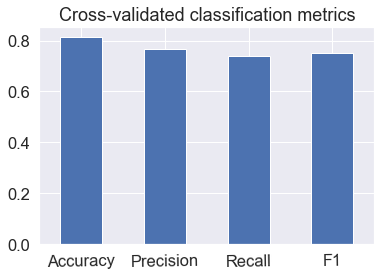

In [163]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False, rot=1);

In [167]:
# Match coef's of features to columns
cat_model.calc_feature_statistics(data=X_train,target=y_train)

{'Pclass': {'borders': array([1.5, 2.5], dtype=float32),
  'binarized_feature': array([2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2,
         0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2,
         2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2,
         1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
         1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1,
         2, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1,
         2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0,
         2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0,
         0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
         0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2,
         1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2,
         1, 1, 2, 2, 2

In [168]:
y_preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [173]:
test_data = pd.read_csv("./data/test.csv", index_col="PassengerId")
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [174]:
test_data_tmp = preprocess_data(test_data)
test_data_tmp.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Cabin_is_missing
PassengerId,,,,,,,,,,,
892,3,2,34.5,0,0,7.8292,0,2,False,False,True
893,3,1,47.0,1,0,7.0000,0,3,False,False,True
894,2,2,62.0,0,0,9.6875,0,2,False,False,True
895,3,2,27.0,0,0,8.6625,0,3,False,False,True
896,3,1,22.0,1,1,12.2875,0,3,False,False,True


In [175]:
test_data_tmp.info(), df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    int8   
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              418 non-null    float64
 6   Cabin             418 non-null    int8   
 7   Embarked          418 non-null    int8   
 8   Age_is_missing    418 non-null    bool   
 9   Fare_is_missing   418 non-null    bool   
 10  Cabin_is_missing  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3), int8(3)
memory usage: 22.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Su

(None, None)

In [177]:
test_data_tmp["Embarked_is_missing"] = False
test_data_tmp

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_is_missing,Fare_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,,,,,,,,,,,,
892,3,2,34.5,0,0,7.8292,0,2,False,False,True,False
893,3,1,47.0,1,0,7.0000,0,3,False,False,True,False
894,2,2,62.0,0,0,9.6875,0,2,False,False,True,False
895,3,2,27.0,0,0,8.6625,0,3,False,False,True,False
896,3,1,22.0,1,1,12.2875,0,3,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,2,27.0,0,0,8.0500,0,3,True,False,True,False
1306,1,1,39.0,0,0,108.9000,23,1,False,False,False,False
1307,3,2,38.5,0,0,7.2500,0,3,False,False,True,False


In [179]:
y_preds_test_data = cat_model.predict(test_data_tmp)
y_preds_test_data

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [184]:
submission_data = pd.DataFrame(data={
    "PassengerId": test_data.index,
    "Survived": y_preds_test_data
},columns=["PassengerId","Survived"])
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [186]:
submission_data.to_csv('submissions.csv',index=False)